# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
weather_api_key

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}" #"&q={city}"

In [5]:
print("Beginning Data Retrieval")    
print("----------------------------")

count=1
set_count=1
city_data=[]
for i, city in enumerate(cities):
   
    
    if(i % 50 ==0 and i >= 50):
        count=0
        set_count +=1
    city_url = query_url + "&q=" + city

    print(f'Processing Record {count} of Set {set_count} | {city}')
    count+=1
    
    try:   
        response=requests.get(city_url).json()    

        Cloudiness=response['clouds']['all']
        Country=response['sys']['country']
        Date=response['dt']
        Humidity=response['main']['humidity']
        Lat=response['coord']['lat']
        Lng=response['coord']['lon']
        Max_Temp=response['main']['temp_max']
        Wind_Speed=response['wind']['speed']

        city_data.append({"City": city,
                         "Cloudiness":Cloudiness,
                         "Country":Country,
                         "Date":Date,
                         "Humidity":Humidity,
                         "Lat":Lat,
                         "Lng":Lng,
                         "Max_Temp":Max_Temp,
                         "Wind_Speed":Wind_Speed})

    except Exception:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | yerbogachen
Processing Record 2 of Set 1 | senmonorom
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | auckland
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | kulhudhuffushi
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | saint-pierre
Processing Record 19 of Set 1 | san rafael
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 

City not found. Skipping...
Processing Record 37 of Set 4 | ucluelet
Processing Record 38 of Set 4 | wattegama
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | kautokeino
Processing Record 42 of Set 4 | ngunguru
Processing Record 43 of Set 4 | ratnagiri
Processing Record 44 of Set 4 | solano
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | floriano
Processing Record 49 of Set 4 | curanilahue
Processing Record 0 of Set 5 | celestun
Processing Record 1 of Set 5 | mangrol
Processing Record 2 of Set 5 | comodoro rivadavia
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | tyrma
Processing Record 6 of Set 5 | gamba
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | lazaro

Processing Record 30 of Set 8 | semirom
Processing Record 31 of Set 8 | sohbatpur
Processing Record 32 of Set 8 | majene
Processing Record 33 of Set 8 | santa vitoria do palmar
Processing Record 34 of Set 8 | baruun-urt
Processing Record 35 of Set 8 | fasa
Processing Record 36 of Set 8 | ndende
Processing Record 37 of Set 8 | jogindarnagar
Processing Record 38 of Set 8 | kalmanka
Processing Record 39 of Set 8 | tatarsk
Processing Record 40 of Set 8 | basco
Processing Record 41 of Set 8 | ust-nera
Processing Record 42 of Set 8 | owando
Processing Record 43 of Set 8 | takhtamygda
Processing Record 44 of Set 8 | wagar
Processing Record 45 of Set 8 | le vauclin
Processing Record 46 of Set 8 | prince rupert
Processing Record 47 of Set 8 | heihe
Processing Record 48 of Set 8 | mandiana
Processing Record 49 of Set 8 | zharkent
Processing Record 0 of Set 9 | malanje
Processing Record 1 of Set 9 | okhotsk
Processing Record 2 of Set 9 | tavistock
Processing Record 3 of Set 9 | kazerun
Processing

Processing Record 17 of Set 12 | kijang
Processing Record 18 of Set 12 | waingapu
Processing Record 19 of Set 12 | chipata
Processing Record 20 of Set 12 | juneau
Processing Record 21 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 22 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 23 of Set 12 | sisimiut
Processing Record 24 of Set 12 | yulin
Processing Record 25 of Set 12 | junction city
Processing Record 26 of Set 12 | huarmey
Processing Record 27 of Set 12 | ambon
Processing Record 28 of Set 12 | uray
Processing Record 29 of Set 12 | harnosand
Processing Record 30 of Set 12 | kombissiri
Processing Record 31 of Set 12 | rabo de peixe
Processing Record 32 of Set 12 | mendi
Processing Record 33 of Set 12 | dingle
Processing Record 34 of Set 12 | bay roberts
Processing Record 35 of Set 12 | pringsewu
Processing Record 36 of Set 12 | auki
Processing Record 37 of Set 12 | avera
Processing Record 38 of Set 12 | bilma
Processing Record 39 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df=pd.DataFrame(city_data)
city_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max_Temp      559
Wind_Speed    559
dtype: int64

In [7]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,yerbogachen,100,RU,1586583228,79,61.28,108.01,36.66,7.34
1,ushuaia,40,AR,1586583229,75,-54.80,-68.30,41.00,4.70
2,alice springs,9,AU,1586583229,14,-23.70,133.88,84.20,10.29
3,hermanus,99,ZA,1586583229,91,-34.42,19.23,62.01,1.99
4,auckland,43,NZ,1586583002,59,-36.87,174.77,66.00,8.05


In [11]:
city_df.to_csv("/Users/yxair/Desktop/NW Bootbcamps/nu-chi-data-pt-02-2020-u-c-master/Homework/06-Python-APIs/Instructions/output_data/CityWeatherData.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

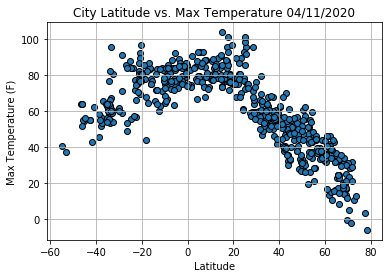

In [13]:
plt.scatter(city_df["Lat"], city_df["Max_Temp"], marker="o",edgecolors="black")

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("/Users/yxair/Desktop/NW Bootbcamps/nu-chi-data-pt-02-2020-u-c-master/Homework/06-Python-APIs/Instructions/output_data/Latitude vs. Temperature Plot.png")


plt.show()

#### Latitude vs. Humidity Plot

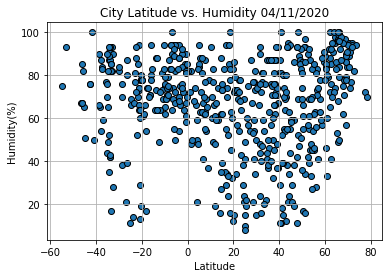

In [19]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o",edgecolors="black")

plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("/Users/yxair/Desktop/NW Bootbcamps/nu-chi-data-pt-02-2020-u-c-master/Homework/06-Python-APIs/Instructions/output_data/Latitude vs. Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

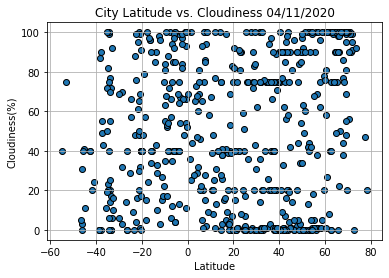

In [15]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o",edgecolors="black")

plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("/Users/yxair/Desktop/NW Bootbcamps/nu-chi-data-pt-02-2020-u-c-master/Homework/06-Python-APIs/Instructions/output_data/Latitude vs. Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

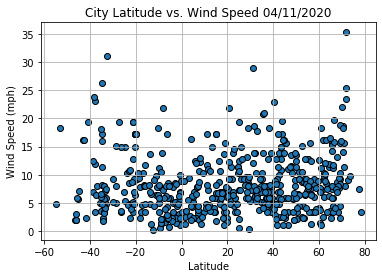

In [18]:
plt.scatter(city_df["Lat"], city_df["Wind_Speed"], marker="o",edgecolors="black")


plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("/Users/yxair/Desktop/NW Bootbcamps/nu-chi-data-pt-02-2020-u-c-master/Homework/06-Python-APIs/Instructions/output_data/Latitude vs. Wind Speed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
nh_df=city_df[city_df["Lat"]>0]
nh_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,yerbogachen,100,RU,1586583228,79,61.28,108.01,36.66,7.34
5,axim,81,GH,1586583229,84,4.87,-2.24,79.79,5.21
7,kulhudhuffushi,20,MV,1586583229,67,6.62,73.07,85.21,7.74
8,lata,75,PT,1586583254,87,40.16,-8.33,57.20,4.70
9,jamestown,90,US,1586583254,80,42.10,-79.24,37.99,6.93


The r-squared is: 0.8119628237242745


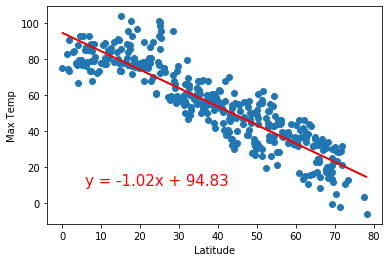

In [31]:
x_values = nh_df['Lat']
y_values = nh_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
sh_df=city_df[city_df["Lat"]<0]
sh_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,ushuaia,40,AR,1586583229,75,-54.80,-68.30,41.00,4.70
2,alice springs,9,AU,1586583229,14,-23.70,133.88,84.20,10.29
3,hermanus,99,ZA,1586583229,91,-34.42,19.23,62.01,1.99
4,auckland,43,NZ,1586583002,59,-36.87,174.77,66.00,8.05
6,faanui,96,PF,1586583229,71,-16.48,-151.75,83.48,8.16


The r-squared is: 0.4405819050831231


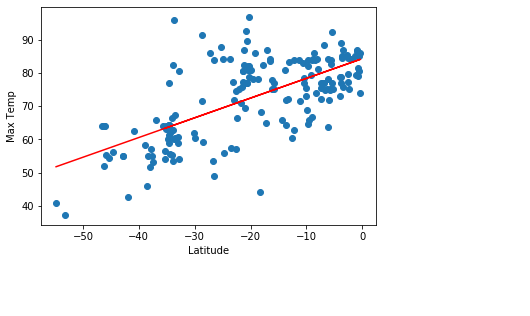

In [37]:
x_values = sh_df['Lat']
y_values = sh_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07008098454171781


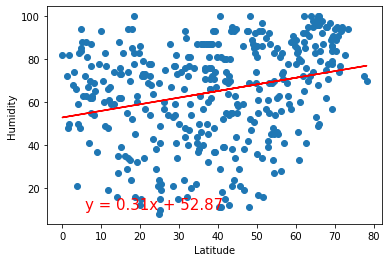

In [38]:
x_values = nh_df['Lat']
y_values = nh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02024624533712232


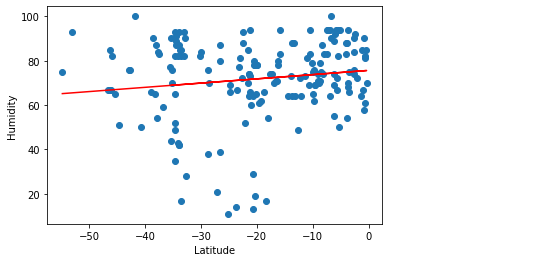

In [39]:
x_values = sh_df['Lat']
y_values = sh_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04953741487435913


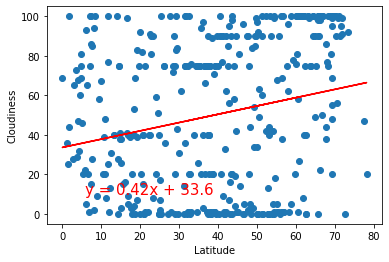

In [40]:
x_values = nh_df['Lat']
y_values = nh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11601391628222919


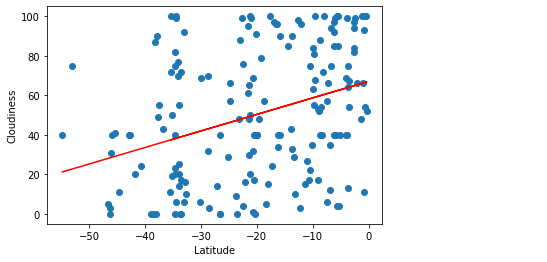

In [41]:
x_values = sh_df['Lat']
y_values = sh_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03624400949210857


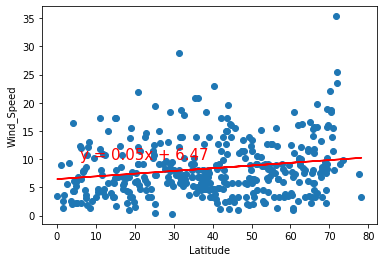

In [42]:
x_values = nh_df['Lat']
y_values = nh_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06273121832922053


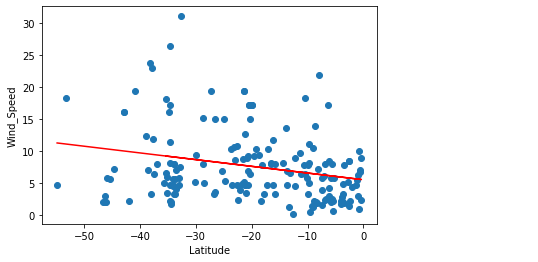

In [43]:
x_values = sh_df['Lat']
y_values = sh_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()